In [11]:
import spacy
import pandas as pd

In [12]:
reports = pd.read_csv('reports.csv')
reports['text'] = reports['text'].str.replace(r'\s+',' ', regex=True)
reports.head()

,Unnamed: 0,filepath,number_of_pages,text
0,0,./reports/entire_merck_crr19.pdf,224,Merck Corporate Responsibility Report 2019 co...


In [13]:
nlp = spacy.load('en_core_web_sm')

In [14]:
doc = nlp(reports['text'].values[0])

In [15]:
print(f"Token \t\tLemma \t\tStopword".format('Token', 'Lemma', 'Stopword'))
print("-"*40)
for token in doc:
    print(f"{str(token)}\t\t{token.lemma_}\t\t{token.is_stop}")

9		False
Facts		fact		False
&		&		False
figures		figure		False
publication		publication		False
tcontrioutors		tcontrioutor		False
Published		publish		False
on		on		True
April		April		False
14		14		False
,		,		False
2020		2020		False
by		by		True
Merck		Merck		False
,		,		False
Group		Group		False
Corporate		Corporate		False
Responsibility		Responsibility		False
Frankfurter		Frankfurter		False
Strasse		Strasse		False
250		250		False
,		,		False
64293		64293		False
Darmstadt		Darmstadt		False
,		,		False
Germany		Germany		False
Tel		Tel		False
.		.		False
:		:		False
+49		+49		False
(		(		False
0		0		False
)		)		False
6151		6151		False
-		-		False
72		72		False
0		0		False
Fax		fax		False
:		:		False
+49		+49		False
(		(		False
0		0		False
)		)		False
6151		6151		False
-		-		False
72		72		False
5577		5577		False
Website		website		False
:		:		False
www.merckgroup.com		www.merckgroup.com		False
Contact		Contact		False
for		for		True
questions		question		False
regarding		regard		True
this		

In [18]:
# https://stackoverflow.com/questions/55817040/removing-stop-words-using-spacy#55818253
import spacy
import pandas as pd

# Load spacy model
nlp = spacy.load('en_core_web_sm')        

# New stop words list 
customize_stop_words = [
    'attach'
]

# Mark them as stop words
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True


# Test data
# df = pd.DataFrame( {'Sumcription': ["attach poster on the wall because it is cool",
#                                    "eating and sleeping"]})

# Convert each row into spacy document and return the lemma of the tokens in 
# the document if it is not a sotp word. Finally join the lemmas into as a string
reports['text_processed'] = reports.text.apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text) 
                                                   if not token.is_stop))

print (reports.head())


   Unnamed: 0                          filepath  number_of_pages  \
0           0  ./reports/entire_merck_crr19.pdf              224   

                                                text  \
0   Merck Corporate Responsibility Report 2019 co...   

                                      text_processed  
0    Merck Corporate Responsibility Report 2019 c...  


In [20]:
reports.to_csv('processed.csv')
processed = pd.read_csv('processed.csv')
processed['text'].values[0]

 hospitals on the other. Traces Substances dissolved in water that are present only in minute amounts. Also referred to as micropollutants, these are synthetic substances present in concentrations ranging from one nanogram to one microgram per liter of water. Transfer of value Direct and indirect transfers of value, whether in cash, in kind or otherwise (for instance promotional purposes). TRIPS The Agreement on Trade-Related Aspects of Intellectual Property Rights is an international legal agreement between all the member nations of the World Trade Organization. TRIPS seeks to ensure that the measures and procedures for enforcing intellectual property rights do not become a barrier to lawful trade. WASH This stands for “water, sanitation and hygiene”. WLTP Lawmakers require standardized test procedures to measure how much fuel a car consumes and whether it complies with the emissions limits. The new Worldwide Harmonised Light Vehicle Test Procedure (WLTP) took effect in the EU on Sept

In [21]:
processed['text_processed'].values[0]

chnology , engineering , mathematic . stem cell line group stem cell derive animal human tissue . cultivate vitro multiply indefinitely . stem cell undifferentiate cell potential develop different cell type carry different function . Sunshine Act Sunshine Provisions U.S. Patient Protection Affordable Care Act aim create transparent relationship manufacturer drug , medical device medical aid hand , doctor teaching hospital . trace substance dissolve water present minute amount . refer micropollutant , synthetic substance present concentration range nanogram microgram liter water . transfer value direct indirect transfer value , cash , kind ( instance promotional purpose ) . TRIPS Agreement Trade - relate Aspects Intellectual Property Rights international legal agreement member nation World Trade Organization . TRIPS seek ensure measure procedure enforce intellectual property right barrier lawful trade . wash stand " water , sanitation hygiene " . WLTP lawmaker require standardized test 

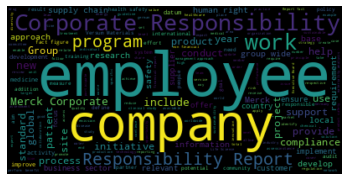

In [26]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(processed['text_processed'].values[0])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()